In [11]:
import numpy as np
import matplotlib.pyplot as plt

from alpub_autoencoder.autoencoder_utils import read_payri_images
from alpub_autoencoder.image_processor_utils import smoothen_image
from alpub_autoencoder.image_processor_utils import apply_adaptive_thresholding
from alpub_autoencoder.image_processor_utils import apply_erosion_dialiation
from alpub_autoencoder.image_processor_utils import remove_disconnected_regions
from alpub_autoencoder.image_processor_utils import apply_otsu_thresholding
from alpub_autoencoder.image_processor_utils import fill_background_patches

from PIL import Image

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
PAPYRI_BASE= '../../Datasets/alpub_v2/papyri_images'
OXYRUNCHUS_PATH = '../../Datasets/alpub_v2/papyri_images/oxynrunchus'

In [13]:
img_list = read_payri_images(OXYRUNCHUS_PATH)

Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\1.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\10.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\100.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\101.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\102.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\103.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\104.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\105.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\106.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\107.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\108.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\109.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\11.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\110.jpg
Reading ../../Datasets/alpub_v2/papyri_images/oxynrunchus\111.jpg
Reading ../../

D:\MSc - Birmingham\MSc Project\Vesuvius\alpub_autoencoder\autoencoder_utils.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(image_list)


In [5]:
img_list.shape

(258,)

In [6]:
# Convert the RGB images to grayscale
img_gray = []
for img in img_list:
    image_gray = Image.fromarray(img).convert("L")
    img_gray.append(np.array(image_gray))

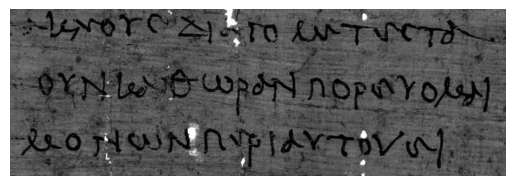

In [14]:
# Load the greyscaled image

image_no = -84
image = img_gray[image_no]

# Display the grayscale image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [15]:
import cv2

In [16]:
# Apply smoothing
image_smooth = smoothen_image(image, kernel_size=5)

In [17]:
# Read the image using cv2
image = image_smooth

# Step 1: Threshold the image to identify the white paths
_, thresholded = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)  # Adjust threshold value as needed

# Step 2: Create a mask of the white paths
mask = np.zeros_like(image)
mask[thresholded == 255] = 1

# Step 3: Obtain the background intensity value
background_intensity = np.mean(image[mask == 0])

# Step 4: Replace white path pixels with the background intensity value
result_image = np.where(mask == 1, background_intensity, image)
result_image = np.uint8(result_image)

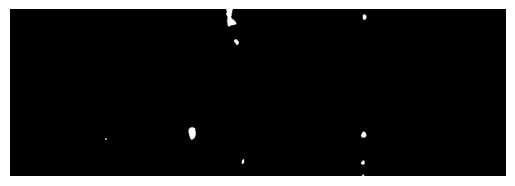

In [19]:
# Display the patched image
plt.imshow(thresholded, cmap="gray")
plt.axis("off")
plt.show()

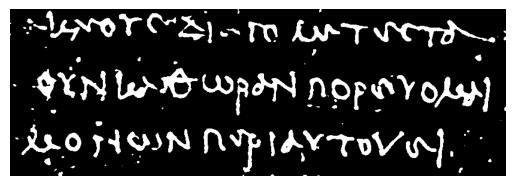

In [20]:
#Apply Otsu's thresholding
otsu_thresholded_image = apply_otsu_thresholding(result_image)

# Display the thresholded image
plt.imshow(otsu_thresholded_image, cmap="gray")
plt.axis("off")
plt.show()

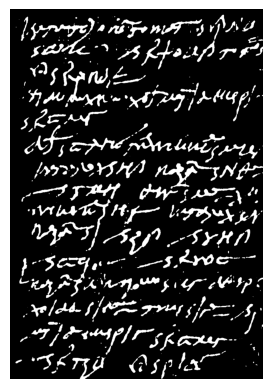

In [57]:
# Perform erosion and dialation
seg_image = apply_erosion_dialiation(otsu_thresholded_image, kernel_size=3, no_iterations=1)

# Display the segmented image
plt.imshow(seg_image, cmap="gray")
plt.axis("off")
plt.show()

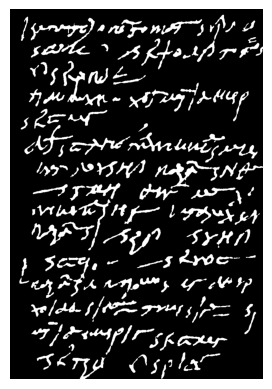

In [58]:
#Remove disconnected regions
filtered_image = remove_disconnected_regions(seg_image,min_region_size=200)

# Display the filtered image
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")
plt.show()

In [86]:
img_no = 0

for image in img_gray:
    # Apply smoothing
    image_smooth = smoothen_image(image, kernel_size=5)
    #Patch Background Regions
    patched_image = fill_background_patches(image_smooth)
    #Apply Otsu's thresholding
    otsu_thresholded_image = apply_otsu_thresholding(patched_image)
    # Perform erosion and dialation
    seg_image = apply_erosion_dialiation(otsu_thresholded_image, kernel_size=3, no_iterations=1)
    #Remove disconnected regions
    filtered_image = remove_disconnected_regions(seg_image,min_region_size=50)

    if img_no > 257:
        resize_fac = 250/150
    else:
        resize_fac = 250/70

    original_height, original_width = filtered_image.shape
    size = (int(original_width*resize_fac), int(original_height*resize_fac))
    resized_image = cv2.resize(filtered_image, dsize=size, interpolation=cv2.INTER_CUBIC)

    file_name = PAPYRI_BASE+'/seg_mask_otsu/'+'img_mask_'+str(img_no)+'.jpg'
    cv2.imwrite(file_name, resized_image)

    img_no = img_no + 1

    print("Image:",file_name,"saved.")

Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_0.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_1.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_2.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_3.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_4.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_5.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_6.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_7.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_8.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_9.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_10.jpg saved.
Image: ../../Datasets/alpub_v2/papyri_images/seg_mask_otsu/img_mask_11.jpg saved.
Image: ../../Datasets/alpu